In [2]:
import networkx as nx
import osmnx as ox
import pandas as pd
import os

ox.__version__

'2.0.0'

## Metrics table

### Generate graph files

In [11]:
# download/model a street network for some city then visualize it
capitals_comarca = [
    "Barcelona", "Girona", "Lleida", "Tarragona", "Mataró", "Sabadell", 
    "Terrassa", "Manresa", "Vic", "Igualada", "Vilafranca del Penedès", "Vilanova i la Geltrú", 
    "el Vendrell", "Reus", "Tortosa", "Amposta", "Gandesa", "Falset", "Montblanc", 
    "Valls", "Balaguer", "Cervera", "Solsona", "la Seu d'Urgell", "Sort", "Tremp", 
    "el Pont de Suert", "Mollerussa", "les Borges Blanques", "Tàrrega", 
    "Olot", "Ripoll", "Puigcerdà", "Banyoles", "la Bisbal d'Empordà", "Santa Coloma de Farners",
    "Figueres", "Vielha e Mijaran", "Berga", "Sant Feliu de Llobregat", "Granollers", "Móra d'Ebre",
    "Prats de Lluçanès", "Moià"
]


for capital in capitals_comarca:
#if capital is not saved, download it
    if not os.path.exists(f"Graphs/{capital}.graphml"):
        print(f"Creant graf de {capital}...")
        try:
            # Obtenir el graf de la ciutat
            G = ox.graph_from_place(capital + ", Catalunya, Spain", network_type='drive')
            
            # Guardar el graf en un fitxer
            ox.save_graphml(G, filepath=f"Graphs/{capital}.graphml")
            print(f"Graf de {capital} creat i guardat.")
        except Exception as e:
            print(f"No s'ha pogut crear el graf per a {capital}: {e}")

Creant graf de Barcelona...
Graf de Barcelona creat i guardat.
Creant graf de Girona...
Graf de Girona creat i guardat.
Creant graf de Lleida...
Graf de Lleida creat i guardat.
Creant graf de Tarragona...
Graf de Tarragona creat i guardat.
Creant graf de Mataró...
Graf de Mataró creat i guardat.
Creant graf de Sabadell...
Graf de Sabadell creat i guardat.
Creant graf de Terrassa...
Graf de Terrassa creat i guardat.
Creant graf de Manresa...
Graf de Manresa creat i guardat.
Creant graf de Vic...
Graf de Vic creat i guardat.
Creant graf de Igualada...
Graf de Igualada creat i guardat.
Creant graf de Vilafranca del Penedès...
Graf de Vilafranca del Penedès creat i guardat.
Creant graf de Vilanova i la Geltrú...
Graf de Vilanova i la Geltrú creat i guardat.
Creant graf de el Vendrell...
Graf de el Vendrell creat i guardat.
Creant graf de Reus...
Graf de Reus creat i guardat.
Creant graf de Tortosa...
Graf de Tortosa creat i guardat.
Creant graf de Amposta...
Graf de Amposta creat i guardat

### Generate metrics table

In [12]:
import math

data = []

H_max = math.log(36)  # ~3.584913
H_g   = 1.386  

for capital in capitals_comarca:
    try:
        # Path to the graphml file for this capital
        graph_file = f"Graphs/{capital}.graphml"
        G = ox.load_graphml(graph_file)

        # Add edge bearings
        ox.bearing.add_edge_bearings(G)

        G_proj = ox.projection.project_graph(G)
        # Show some basic stats about the network
        basic_stats = ox.stats.basic_stats(G_proj)

        # Calcular les mètriques
        num_nodes = len(G.nodes)
        num_edges = len(G.edges)
        avg_node_degree = sum(dict(G.degree()).values()) / num_nodes
        total_length = basic_stats["street_length_total"]
        avg_street_length = basic_stats["street_length_avg"]
        avg_betweenness_centrality_nodes = nx.betweenness_centrality(G_proj)
        avg_betweenness_centrality_nodes = sum(avg_betweenness_centrality_nodes.values()) / num_nodes
        avg_betweenness_centrality_edges = nx.edge_betweenness_centrality(G_proj)
        avg_betweenness_centrality_edges = sum(avg_betweenness_centrality_edges.values()) / num_edges
        orientation_entropy = ox.bearing.orientation_entropy(ox.convert.to_undirected(G))
        phi = 1.0 - ((orientation_entropy - H_g) / (H_max - H_g))**2
        dead_ends = basic_stats["streets_per_node_proportions"][1]
        k4_intersections = basic_stats["streets_per_node_proportions"][4]
        detour_index = basic_stats["circuity_avg"]

        # Afegir les mètriques a la taula
        data.append({
            "Capital": capital,
            "Number of Nodes": num_nodes,
            "Average Node Degree": avg_node_degree,
            "Total Length (m)": total_length,
            "Average Street Length (m)": avg_street_length,
            "Average Betweenness Centrality (Nodes)": avg_betweenness_centrality_nodes,
            "Average Betweenness Centrality (Edges)": avg_betweenness_centrality_edges,
            "Orientation Entropy": orientation_entropy,
            "Normalized Measure of Orientation-Order": phi,
            "Proportion of Dead-ends": dead_ends,
            "Proportion of k=4 Intersections": k4_intersections,
            "Detour Index": detour_index
        })

        print(f"Mètriques de {capital} calculades i afegides a la taula.")
    except Exception as e:
        print(f"No s'han pogut calcular les mètriques per a {capital}: {e}")

# Crear el DataFrame
df_data = pd.DataFrame(data)

Mètriques de Barcelona calculades i afegides a la taula.
Mètriques de Girona calculades i afegides a la taula.
Mètriques de Lleida calculades i afegides a la taula.
Mètriques de Tarragona calculades i afegides a la taula.
Mètriques de Mataró calculades i afegides a la taula.
Mètriques de Sabadell calculades i afegides a la taula.
Mètriques de Terrassa calculades i afegides a la taula.
Mètriques de Manresa calculades i afegides a la taula.
Mètriques de Vic calculades i afegides a la taula.
Mètriques de Igualada calculades i afegides a la taula.
Mètriques de Vilafranca del Penedès calculades i afegides a la taula.
Mètriques de Vilanova i la Geltrú calculades i afegides a la taula.
Mètriques de el Vendrell calculades i afegides a la taula.
Mètriques de Reus calculades i afegides a la taula.
Mètriques de Tortosa calculades i afegides a la taula.
Mètriques de Amposta calculades i afegides a la taula.
Mètriques de Gandesa calculades i afegides a la taula.
Mètriques de Falset calculades i afe

In [13]:
#write the datafreame to a csv file
df_data.to_csv("metrics.csv", index=False)

## Visualisation

### Betweenness centrality

#### Edges

In [15]:
import matplotlib.pyplot as plt

# Define output folder path
output_folder = os.path.join("Visualisations", "BC", "Edges")

# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

for capital in capitals_comarca:
    try:
        # Path to the graphml file for this capital
        graph_file = f"Graphs/{capital}.graphml"
        G = ox.load_graphml(graph_file)
        G_proj = ox.projection.project_graph(G)
        # Edge betweenness centrality
        edge_betweenness = nx.edge_betweenness_centrality(G_proj, normalized=True, weight='length')
        all_edges = list(G_proj.edges(keys=True)) 
        edge_betweenness_values = [edge_betweenness[(u, v, k)] for (u, v, k) in all_edges]

        # Normalize betweenness for linewidth scaling
        max_bet = max(edge_betweenness_values)
        min_bet = min(edge_betweenness_values)
        edge_widths = [1 + 4 * ((bet - min_bet) / (max_bet - min_bet)) for bet in edge_betweenness_values]

        # Plot the graph with varying edge widths
        fig, ax = ox.plot_graph(
            G_proj,
            edge_color='steelblue',
            edge_linewidth=edge_widths,
            node_size=0,  # Hide nodes for clarity
            bgcolor='white',
            show=False,
            close=False
        )

        # Build the file path for saving
        output_path = os.path.join(output_folder, f"{capital}_edge_betweenness.png")

        # Save the figure at high resolution
        fig.savefig(output_path, dpi=300, bbox_inches="tight")

        # Close the figure to free memory (especially important in a loop)
        plt.close(fig)

        print(f"Plot saved for {capital} at {output_path}")
        
    except Exception as e:
        print(f"The visualisation could not be created for {capital}: {e}")

Plot saved for Barcelona at Visualisations\BC\Edges\Barcelona_edge_betweenness.png
Plot saved for Girona at Visualisations\BC\Edges\Girona_edge_betweenness.png
Plot saved for Lleida at Visualisations\BC\Edges\Lleida_edge_betweenness.png
Plot saved for Tarragona at Visualisations\BC\Edges\Tarragona_edge_betweenness.png
Plot saved for Mataró at Visualisations\BC\Edges\Mataró_edge_betweenness.png
Plot saved for Sabadell at Visualisations\BC\Edges\Sabadell_edge_betweenness.png
Plot saved for Terrassa at Visualisations\BC\Edges\Terrassa_edge_betweenness.png
Plot saved for Manresa at Visualisations\BC\Edges\Manresa_edge_betweenness.png
Plot saved for Vic at Visualisations\BC\Edges\Vic_edge_betweenness.png
Plot saved for Igualada at Visualisations\BC\Edges\Igualada_edge_betweenness.png
Plot saved for Vilafranca del Penedès at Visualisations\BC\Edges\Vilafranca del Penedès_edge_betweenness.png
Plot saved for Vilanova i la Geltrú at Visualisations\BC\Edges\Vilanova i la Geltrú_edge_betweenness.

### Street angle orientation

#### Single polar histogram

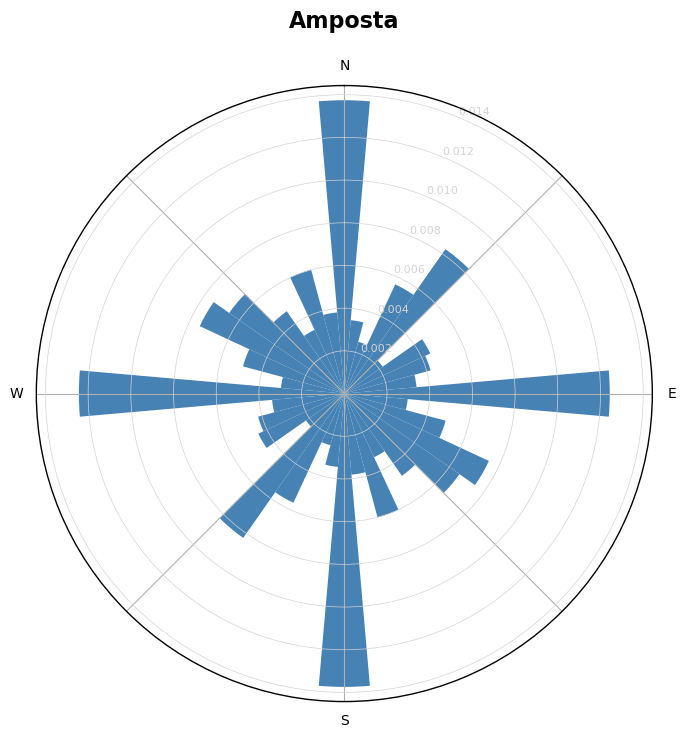

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define output folder path
output_folder = os.path.join("Visualisations", "Polar histograms", "Increasing entropy")

# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

for capital in capitals_comarca:
    try:
        # Path to the graphml file for this capital
        graph_file = f"Graphs/{capital}.graphml"
        G = ox.load_graphml(graph_file)
        
        # Ensure graph is undirected
        if G.is_directed():
            G = ox.convert.to_undirected(G)
        
        # Add bearing attributes to each edge
        G = ox.bearing.add_edge_bearings(G)
        
        # Step 2: Extract and duplicate bearings for undirected streets
        all_bearings = []
        for u, v, key, data in G.edges(keys=True, data=True):
            if u == v or "bearing" not in data:
                continue
            bearing = data["bearing"]
            all_bearings.append(bearing)
            # Add reciprocal bearing for the opposite direction
            reverse_bearing = (bearing + 180) % 360
            all_bearings.append(reverse_bearing)
        
        bearings = np.array(all_bearings)
        
        # For this example, assume equal weight for each bearing
        weights = np.ones_like(bearings)
        
        # Step 3: Use split-and-merge approach to compute histogram bins
        num_bins = 36
        num_split_bins = num_bins * 2  # 72 bins for splitting
        # Create split bin edges from 0° to 360° (for 72 bins)
        split_bin_edges = np.linspace(0, 360, num_split_bins + 1)
        
        # Compute histogram on the split bins
        split_bin_counts, split_bin_edges = np.histogram(
            bearings,
            bins=split_bin_edges,
            weights=weights,
            density=True
        )
        
        # Roll the counts so near-boundary bearings are grouped together
        split_bin_counts = np.roll(split_bin_counts, 1)
        
        # Merge adjacent bins to form final 36 bins
        bin_counts = split_bin_counts[::2] + split_bin_counts[1::2]
        
        # Compute bin centers: every other edge from the split bins
        bin_centers = split_bin_edges[range(0, num_split_bins, 2)]
        
        # Convert bin centers to radians for polar plotting
        bin_centers_rad = np.radians(bin_centers)
        
        # Width of each bin in radians (10° width)
        bin_width_rad = np.radians(10)
        
        # Step 4: Plot the polar histogram
        fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
        
        # Create bars for each bin
        bars = ax.bar(bin_centers_rad, bin_counts, width=bin_width_rad, bottom=0.0, alpha=1, color="steelblue")
        
        # Customize the polar plot
        ax.set_theta_zero_location("N")  # Set 0° at the top (North)
        ax.set_theta_direction(-1)       # Angles increase clockwise
        
        # Make radial lines at every 45°:
        angles = [0, 45, 90, 135, 180, 225, 270, 315]
        
        # Give labels for only the cardinal directions, leaving others blank:
        labels = ["N", "", "E", "", "S", "", "W", ""]
        
        ax.set_thetagrids(angles, labels=labels)
        ax.set_title("Amposta", y=1.08, fontsize=16, fontweight="bold")
        
        # ──────────────────────────────────────────────
        #    MAKE CIRCLES THINNER AND NUMBERS LIGHTER
        # ──────────────────────────────────────────────
        
        # 1) Make radial grid lines thinner and a light color
        for circle in ax.yaxis.get_gridlines():
            circle.set_linewidth(0.5)       
            circle.set_color("lightgray")  
        
        # 2) Make the radial tick labels light gray
        for label in ax.yaxis.get_ticklabels():
            label.set_color("lightgray")
            label.set_fontsize(8)
        
        # 3) Optionally do the same for the radial spine (outer circle):
        ax.spines["polar"].set_linewidth(1.0)       
        ax.spines["polar"].set_color("black")  

        # plt.show() or save as image     
        

    except Exception as e:
        print(f"The visualisation could not be created for {capital}: {e}")


#### Combined polar histogram ordered by increasing entropy

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Define output folder path
output_folder = os.path.join("Visualisations", "Polar histograms")

# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

# 1. Sort df_data by increasing Orientation Entropy
df_data_sorted = df_data.sort_values(by="Orientation Entropy", ascending=True)

# 2. Decide how many subplots across (ncols) and down (nrows) you want
#    Since you have 44 cities, you can do, e.g., 6 rows x 8 columns = 48 subplots total
nrows, ncols = 6, 8
fig, axes = plt.subplots(nrows=nrows,
                         ncols=ncols,
                         subplot_kw={'projection': 'polar'},
                         figsize=(24, 18))  # Feel free to adjust size

# 3. Iterate through each city in ascending order of entropy
for i, row in enumerate(df_data_sorted.itertuples(index=False)):
    
    capital = row.Capital          # or however you store city names

    # Identify which "ax" (subplot) we should draw on
    ax = axes[i // ncols, i % ncols]
    
    try:
        # Load the graph
        graph_file = f"Graphs/{capital}.graphml"
        G = ox.load_graphml(graph_file)

        # Ensure graph is undirected
        if G.is_directed():
            G = ox.convert.to_undirected(G)

        # Add bearing attributes
        G = ox.bearing.add_edge_bearings(G)

        # Gather bearings (duplicating for undirected streets)
        all_bearings = []
        for u, v, key, data in G.edges(keys=True, data=True):
            if u == v or "bearing" not in data:
                continue
            bearing = data["bearing"]
            all_bearings.append(bearing)
            reverse_bearing = (bearing + 180) % 360
            all_bearings.append(reverse_bearing)

        bearings = np.array(all_bearings)
        weights = np.ones_like(bearings)  # Equal weight for each bearing

        # Split-and-merge approach
        num_bins = 36
        num_split_bins = num_bins * 2  # 72 bins
        split_bin_edges = np.linspace(0, 360, num_split_bins + 1)

        split_bin_counts, _ = np.histogram(
            bearings,
            bins=split_bin_edges,
            weights=weights,
            density=True
        )
        # Roll and merge
        split_bin_counts = np.roll(split_bin_counts, 1)
        bin_counts = split_bin_counts[::2] + split_bin_counts[1::2]

        # Convert bin centers to radians
        bin_centers = split_bin_edges[range(0, num_split_bins, 2)]
        bin_centers_rad = np.radians(bin_centers)
        bin_width_rad = np.radians(10)  # Each bin is 10°

        # Plot polar histogram in the current subplot
        bars = ax.bar(bin_centers_rad, bin_counts,
                      width=bin_width_rad, bottom=0.0,
                      alpha=1, color="steelblue")

        # Customize polar orientation
        ax.set_theta_zero_location("N")
        ax.set_theta_direction(-1)

        # Minor aesthetic settings
        angles = [0, 45, 90, 135, 180, 225, 270, 315]
        labels = ["N", "", "E", "", "S", "", "W", ""]
        ax.set_thetagrids(angles, labels=labels)
        
        # Give each subplot a title
        # Showing the city name + entropy, if desired
        ax.set_title(f"{capital}", y=1.15, fontsize=12, fontweight="bold")

        # Make circles thinner and numbers lighter
        for circle in ax.yaxis.get_gridlines():
            circle.set_linewidth(0.5)
            circle.set_color("lightgray")
        for label in ax.yaxis.get_ticklabels():
            label.set_color("lightgray")
            label.set_fontsize(8)
        ax.spines["polar"].set_linewidth(1.0)
        ax.spines["polar"].set_color("black")

    except Exception as e:
        # If something fails for a particular city, just print the error
        print(f"Visualization could not be created for {capital}: {e}")
        # Optionally turn off that subplot
        ax.axis("off")

# 4. Turn off any leftover subplots (if you have fewer than nrows*ncols)
total_plots = nrows * ncols
for j in range(len(df_data_sorted), total_plots):
    axes[j // ncols, j % ncols].axis("off")

plt.tight_layout()

# 5. Finally, save the entire figure to the output folder
output_path = os.path.join(output_folder, "polar_histograms_by_increasing_entropy.png")
plt.savefig(output_path, dpi=300, bbox_inches="tight")
plt.close(fig)

print(f"Saved combined figure with all histograms to {output_path}")

Saved combined figure with all histograms to Visualisations\Polar histograms\polar_histograms_by_increasing_entropy.png


#### Street network + polar histogram for maximum and minimun entropy cities

In [112]:
# Define output folder path
output_folder = os.path.join("Visualisations", "Polar histograms")

# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

cities = ["Granollers", "Manresa"]

for city_name in cities:
    graph_file = f"Graphs/{city_name}.graphml"

    # Load and ensure undirected
    G = ox.load_graphml(graph_file)
    if G.is_directed():
        G = ox.convert.to_undirected(G)

    ###############################################################################
    # 1) Create a SINGLE main figure + main axes for the street network
    ###############################################################################
    fig, ax_main = plt.subplots(figsize=(10, 10))  # adjust as you like

    # Plot the street network on ax_main
    ox.plot_graph(
        G,
        ax=ax_main,
        show=False,
        close=False,
        node_size=0,        
        edge_color="darkgray",
        edge_linewidth=0.6
    )

    # Remove any title, ticks, or labels from the main axes
    ax_main.set_title("")  # no title
    ax_main.set_xticks([])
    ax_main.set_yticks([])

    ###############################################################################
    # 2) Add a smaller INSET axes for the polar histogram (bottom-right corner)
    ###############################################################################
    # The [left, bottom, width, height] coordinates range from 0 to 1
    # across the figure. Tweak them until the histogram is where you want it.
    # Decide inset placement before creating the axes

    if city_name == "Manresa":
        # bottom-left
        inset_bounds = [0.1, 0.1, 0.2, 0.2]  # [left, bottom, width, height]
    else:
        # bottom-right
        inset_bounds = [0.65, 0.1, 0.2, 0.2]
    
    inset_ax = fig.add_axes(inset_bounds, projection="polar")

    # Next, create the same polar histogram logic as before
    G = ox.bearing.add_edge_bearings(G)

    all_bearings = []
    for u, v, key, data in G.edges(keys=True, data=True):
        if u == v or "bearing" not in data:
            continue
        bearing = data["bearing"]
        all_bearings.append(bearing)
        reverse_bearing = (bearing + 180) % 360
        all_bearings.append(reverse_bearing)

    bearings = np.array(all_bearings)
    weights = np.ones_like(bearings)

    num_bins = 36
    num_split_bins = num_bins * 2
    split_bin_edges = np.linspace(0, 360, num_split_bins + 1)
    split_bin_counts, _ = np.histogram(bearings, bins=split_bin_edges,
                                       weights=weights, density=True)
    # Roll, then merge adjacent bins
    split_bin_counts = np.roll(split_bin_counts, 1)
    bin_counts = split_bin_counts[::2] + split_bin_counts[1::2]

    bin_centers = split_bin_edges[range(0, num_split_bins, 2)]
    bin_centers_rad = np.radians(bin_centers)
    bin_width_rad = np.radians(10)

    bars = inset_ax.bar(
        bin_centers_rad, bin_counts, 
        width=bin_width_rad, bottom=0.0,
        alpha=1, color="steelblue"
    )

    # Customize orientation
    inset_ax.set_theta_zero_location("N")
    inset_ax.set_theta_direction(-1)

    # Show radial lines every 45°, label only N/E/S/W
    angles = [0, 45, 90, 135, 180, 225, 270, 315]
    labels = ["N", "", "E", "", "S", "", "W", ""]
    inset_ax.set_thetagrids(angles, labels=labels)

    # City name on top of the histogram
    inset_ax.set_title(city_name, y=1.15, fontsize=14, fontweight="bold")



    # Make circles thinner & radial labels lighter
    for circle in inset_ax.yaxis.get_gridlines():
        circle.set_linewidth(0.5)
        circle.set_color("lightgray")

    for label in inset_ax.yaxis.get_ticklabels():
        label.set_color("lightgray")
        label.set_fontsize(8)

    inset_ax.spines["polar"].set_linewidth(1.0)
    inset_ax.spines["polar"].set_color("black")

    ###############################################################################
    # 3) Save & Show
    ###############################################################################
    out_path = os.path.join(output_folder, city_name + "_street_network_+_polar_histogram.png")
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.close(fig)


## Correlations

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Define output folder path
output_folder = os.path.join("Correlations")

# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

# Read the data from the CSV file
df_data = pd.read_csv("metrics.csv")

# 1) Drop the "Capital" column 
df_numeric = df_data.drop(columns="Capital")

# 2) Prepare empty DataFrames to store correlation and p-values
corr_vals = pd.DataFrame(np.zeros((df_numeric.shape[1], df_numeric.shape[1])),
                         columns=df_numeric.columns,
                         index=df_numeric.columns)
p_vals    = pd.DataFrame(np.zeros((df_numeric.shape[1], df_numeric.shape[1])),
                         columns=df_numeric.columns,
                         index=df_numeric.columns)

# 3) Loop through each pair of columns
for col1 in df_numeric.columns:
    for col2 in df_numeric.columns:
        if col1 == col2:
            # The correlation of a column with itself is 1, and p-value is 0 (by definition)
            corr_vals.loc[col1, col2] = 1.0
            p_vals.loc[col1, col2] = 0.0
        else:
            # Compute Pearson correlation and p-value
            r, p = pearsonr(df_numeric[col1], df_numeric[col2])
            corr_vals.loc[col1, col2] = r
            p_vals.loc[col1, col2] = p

# Save to a CSV file in the output_folder both correlation and p-values
corr_vals.to_csv(os.path.join(output_folder, "correlation_matrix.csv"))
p_vals.to_csv(os.path.join(output_folder, "p_values_matrix.csv"))

In [7]:
# Keep correlation values only if p < 0.05; set everything else to 0
corr_significant = corr_vals.where(p_vals < 0.05, np.nan)

# Keep p-values only if p < 0.05; set everything else to NaN
p_significant = p_vals.where(p_vals < 0.05, np.nan)

# Optionally save them to CSV if desired
corr_significant.to_csv(os.path.join(output_folder, "corr_significant.csv"))
p_significant.to_csv(os.path.join(output_folder, "p_significant.csv"))

## Generate street segment lengths

In [13]:
capital = "Barcelona"
graph_file = f"Graphs/{capital}.graphml"
G = ox.load_graphml(graph_file)

In [14]:
G = ox.convert.to_undirected(G)
G_proj = ox.projection.project_graph(G)

In [15]:
# Convert undirected graph to GeoDataFrame of edges
edges_gdf = ox.convert.graph_to_gdfs(G_proj, nodes=False, edges=True)

# Export just the lengths
lengths = edges_gdf["length"]

In [19]:
output_folder = os.path.join("Analysis of the Street Length Distribution")
# Create the folder (and any intermediate folders) if they don't exist
os.makedirs(output_folder, exist_ok=True)

In [22]:
# Export to the output folder in a single-column CSV with header
output_path = os.path.join(output_folder, f"{capital}_street_lengths.csv")
lengths.to_csv(output_path, index=False, header=["Length (m)"])